In [76]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [77]:
# from collections import defaultdict
# d = defaultdict(LabelEncoder)

In [78]:
df = pd.read_csv('~/EPITECH/TEK5/Data-tests/KaDo.csv')

In [79]:
pd.set_option('display.max_columns', None)

In [80]:
df.columns

Index(['TICKET_ID', 'MOIS_VENTE', 'PRIX_NET', 'FAMILLE', 'UNIVERS', 'MAILLE',
       'LIBELLE', 'CLI_ID'],
      dtype='object')

In [81]:
df["TICKET_ID"] = df["TICKET_ID"].astype(str)

In [82]:
to_drop = ['MOIS_VENTE', 'PRIX_NET', 'FAMILLE', 'UNIVERS', 'MAILLE', 'CLI_ID']
df.drop(to_drop, inplace=True, axis=1)

In [83]:
train, validate, test = np.split(df.sample(frac=1, random_state=42), [int(.01*len(df)), int(.8*len(df))])

In [84]:
train.size

144910

In [85]:
categories = [col for col in train.columns if train[col].dtypes == 'O']
categories

['TICKET_ID', 'LIBELLE']

In [89]:
le = LabelEncoder()
train_data = train.apply(le.fit_transform)

In [88]:
# Encoding the variable
# fit = train.apply(lambda x: d[x.name].fit_transform(x))

In [62]:
# fit

In [63]:
# train_encoded = pd.DataFrame(fit, index=train.index)

In [64]:
# train_data = pd.concat([train_encoded, train.drop(categories, axis=1)], axis=1)

In [65]:
# train_data = train

In [90]:
train_data

,TICKET_ID,LIBELLE
6247049,35555,1174
3529634,12774,874
2432998,58371,1097
585737,20873,117
191928,70795,352
...,...,...
6105799,49355,742
7244886,45022,231
1176118,10149,105
4569325,17891,268


In [67]:
# pca = make_pipeline(StandardScaler(), PCA(0.95))

In [68]:
# result = pca.fit_transform(train_data)

In [69]:
# result.shape

In [92]:
from kmodes.kmodes import KModes

# km = kmodes.KModes(n_clusters=3, init='Huang', n_init=5, verbose=0)
# clusters = km.fit_predict(result)
# clusters

km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(train_data)
fitClusters_cao

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 142442.0


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [93]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = train_data.columns
clusterCentroidsDf

,TICKET_ID,LIBELLE
0,49959,245
1,37007,566


In [94]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(train_data)
fitClusters_huang

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 143189.0


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [97]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(train_data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 143279.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 142442.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 141614.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 141612.0


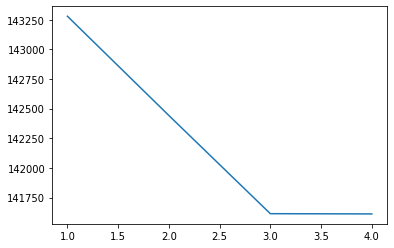

In [98]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [99]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(train_data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 143279.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 143037.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 143213.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 142218.0


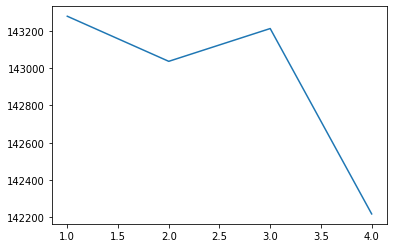

In [100]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [71]:
# km.cluster_centroids_

array([[-2.19879642, -2.15787066],
       [-0.25900596, -1.39615033],
       [ 0.81249808, -1.52017094]])

In [72]:
# u_labels = np.unique(clusters)

In [73]:
# u_labels

array([0, 1, 2], dtype=uint16)

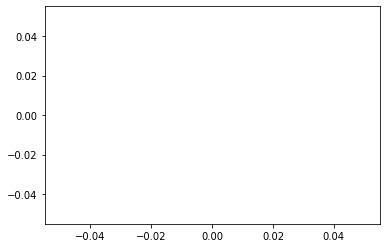

In [74]:
# for i in u_labels:
#     plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)

In [75]:
# Inverse the encoded
#fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
#df.apply(lambda x: d[x.name].transform(x))